<a href="https://colab.research.google.com/github/tecatanka/SWB_Mod_Opt/blob/main/SWB_Tuning_Regression_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
# Import packages
#from __future__ import absolute_import, division, print_function
#import pathlib
#!pip install -q -U keras-tuner  # pip installation of keras tuner

#Google colab
from google.colab import files

# Importing modules for data processing and plotting
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import time

#Statistical modules
from scipy import stats
from scipy.special import inv_boxcox
import pylab
from sklearn.metrics import mean_squared_error

# Importing modules for neural net creation
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("Tensor flow version: ", tf.__version__)

Tensor flow version:  2.12.0


# Regression example using a Neural Net

Energy consumption data


In [2]:
#uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [119]:
# Data acquisition

raw_dataset = pd.read_csv("insurance.csv")

In [120]:
# Create data object to work:

dataset = raw_dataset.copy()
dataset.tail(10) # looking last 10 rows (Note: Python starts indexing with zero 0->974 then 975 data points)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


import numpy as np
from google.colab import autoviz
df_3505148569742835238 = autoviz.get_df('df_3505148569742835238')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3505148569742835238, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1392592335637322995 = autoviz.get_df('df_1392592335637322995')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1392592335637322995, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4375587103699429753 = autoviz.get_df('df_4375587103699429753')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4375587103699429753, *['children'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3200752532850749106 = autoviz.get_df('df_3200752532850749106')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3200752532850749106, *['charges'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5168422442888071216 = autoviz.get_df('df_5168422442888071216')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5168422442888071216, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7619297741550341186 = autoviz.get_df('df_7619297741550341186')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7619297741550341186, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz
df_170982476307555639 = autoviz.get_df('df_170982476307555639')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_170982476307555639, *['children'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3065815933253885100 = autoviz.get_df('df_3065815933253885100')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3065815933253885100, *['charges'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1711982047062430973 = autoviz.get_df('df_1711982047062430973')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1711982047062430973, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2721281160743925050 = autoviz.get_df('df_2721281160743925050')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2721281160743925050, *['smoker'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1454254207320620154 = autoviz.get_df('df_1454254207320620154')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1454254207320620154, *['region'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9206220155410674927 = autoviz.get_df('df_9206220155410674927')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_9206220155410674927, *[[['age', 'bmi'], ['bmi', 'children'], ['children', 'charges']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6691204031579430804 = autoviz.get_df('df_6691204031579430804')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_6691204031579430804, *['sex', 'smoker'], **{})
chart

import numpy as np
from google.colab import autoviz
df_291874217591221859 = autoviz.get_df('df_291874217591221859')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_291874217591221859, *['smoker', 'region'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2113829432469587342 = autoviz.get_df('df_2113829432469587342')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2113829432469587342, *['age', 'sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_775242727769619889 = autoviz.get_df('df_775242727769619889')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_775242727769619889, *['age', 'smoker'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_27615173683579279 = autoviz.get_df('df_27615173683579279')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_27615173683579279, *['age', 'region'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2978576879900314104 = autoviz.get_df('df_2978576879900314104')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2978576879900314104, *['bmi', 'sex'], **{'inner': 'stick'})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


# Brief EDA

In [121]:
# Number of rows in data set
num_rows=len(dataset)
num_rows

1338

In [122]:
# Number of columns
num_cols=len(dataset.columns)
num_cols

7

In [123]:
# Types of columns
types_cols=dataset.dtypes
types_cols

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [124]:
# Clean data
dataset.isna().sum() #add cells that have no data (NA)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [125]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Columns sex smoker and region are categorical

In [126]:
#Dummy variables generation: Job_type
dataset = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region']).astype(int)
dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [127]:
# Create training and test sets

y=dataset.charges
x=dataset.drop('charges', axis=1)
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [128]:
y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64

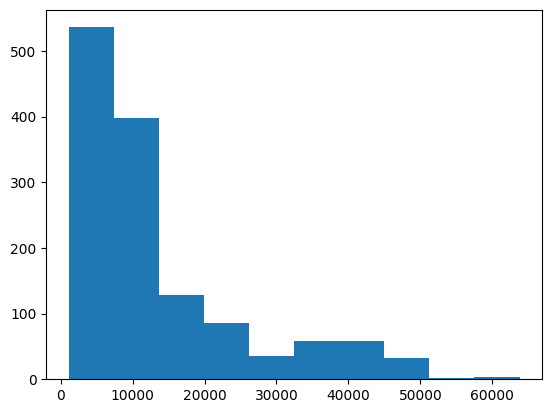

In [129]:
#Histogram of the response variable
plt.hist(y)
plt.show()

In [130]:
# Normality test
norm=stats.normaltest(y)
norm.pvalue

7.0156987886518414e-74

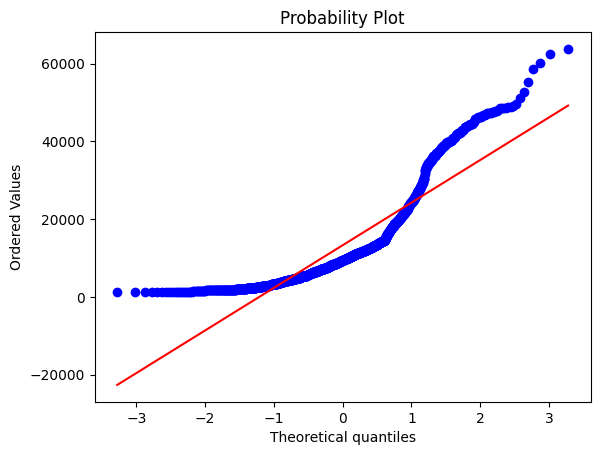

In [131]:
# Q-Q Plot
stats.probplot(y, dist="norm", plot=pylab)
pylab.show()

In [132]:
# Obtaining the "best" transformation with Box-Cox
yt, fit_lambda=stats.boxcox(y)

In [133]:
fit_lambda

0.043716018912177364

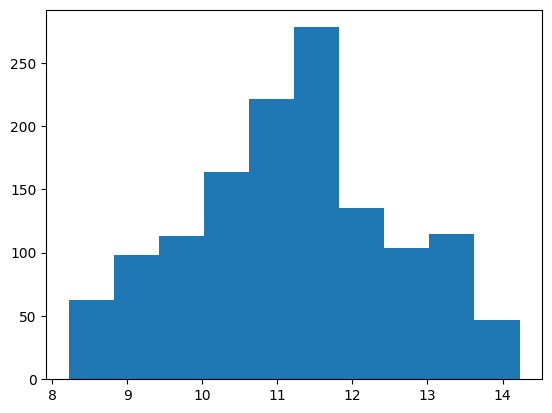

In [134]:
plt.hist(yt)
plt.show()

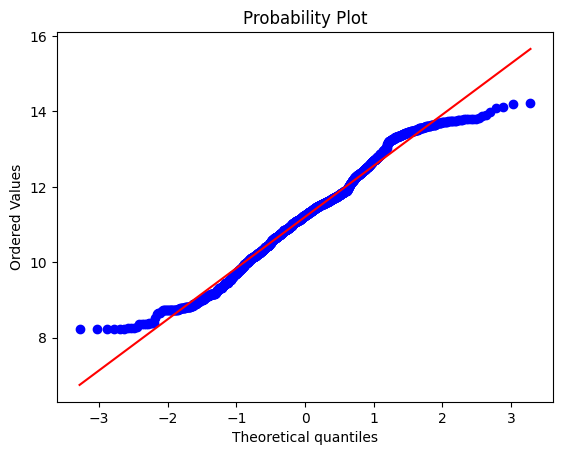

In [135]:
# Q-Q Plot
stats.probplot(yt, dist="norm", plot=pylab)
pylab.show()

In [136]:
# Normality test
norm=stats.normaltest(yt)
norm.pvalue

1.5398265984050724e-12

In [137]:
print(type(yt))
stats.describe(yt)

<class 'numpy.ndarray'>


DescribeResult(nobs=1338, minmax=(8.219048234396992, 14.227156243293791), mean=11.201337041121292, variance=1.8702403009599342, skewness=-0.008737402136693566, kurtosis=-0.6522737372547378)

In [138]:
# Split train and test sets
train_features, test_features, train_label, test_label=train_test_split(x,yt,test_size=0.2, random_state=42)


In [139]:
#number of rows train set
train_rows=len(train_features)
train_rows

1070

In [140]:
#number of rows test set
test_rows=len(test_features)
test_rows

268

In [141]:
#number of rows train set
y_train_rows=len(train_label)
y_train_rows

1070

In [142]:
#number of rows train set
y_test_rows=len(test_label)
y_test_rows

268

In [143]:
# Ranges of values in feature columns
train_features.describe().transpose()[['mean', 'std']]

,mean,std
age,39.357009,14.073960
bmi,30.069159,6.063808
children,1.107477,1.215983
sex_female,0.487850,0.500086
sex_male,0.512150,0.500086
smoker_no,0.794393,0.404334
smoker_yes,0.205607,0.404334
region_northeast,0.249533,0.432945
region_northwest,0.239252,0.426827
region_southeast,0.264486,0.441265


In [144]:
# Normalize variables via normalization layer in Keras:

#Create normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)

#Fit state of preprocessing layer to the data
normalizer.adapt(np.array(train_features))

print(normalizer.mean.numpy())

[[39.35701    30.069159    1.1074772   0.48785046  0.5121495   0.7943925
   0.20560746  0.2495327   0.23925233  0.26448599  0.24672891]]


In [145]:
# Example normalizing the first row of features
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


First example: [[46 19  2  1  0  1  0  0  1  0  0]]

Normalized: [[ 0.47 -1.83  0.73  1.02 -1.02  0.51 -0.51 -0.58  1.78 -0.6  -0.57]]


In [146]:
train_features.head(1)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19,2,1,0,1,0,0,1,0,0


# Linear model (simplistic)

In [147]:
# Linear regression with multiple inputs (X's)
# y=mx+b and m is a matrix, b is a vector

#Creating a two-step sequential model with first layer being normalizer
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])


In [148]:
# Configure model with Keras
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [149]:
%%time
start_simple=time.time()
# Model fit for 100 epochs  (Epoch=complete pass of the training dataset through the algorithm)

history = linear_model.fit(
    train_features,
    train_label,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

end_simple=time.time()
print("time in seconds: ","{:.2f}".format(end_simple-start_simple))

time in seconds:  10.94
CPU times: user 11.6 s, sys: 746 ms, total: 12.4 s
Wall time: 10.9 s


In [150]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)


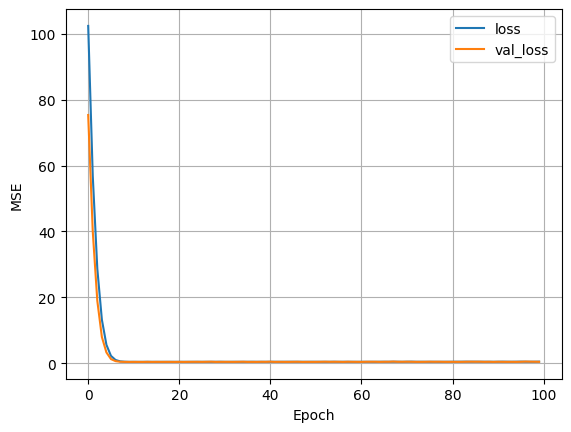

In [151]:
plot_loss(history)


In [152]:
# Collect result for test set
test_results={}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_label, verbose=0)


9/9 [==============================] - 0s 2ms/step


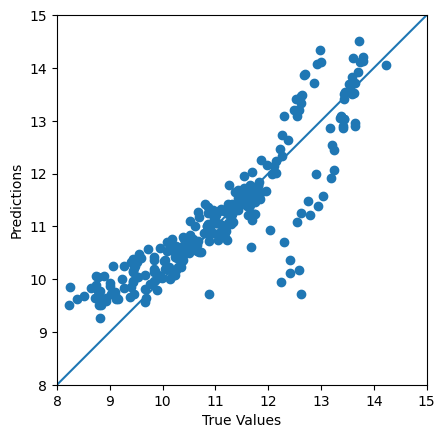

In [153]:
Linear_model_predictions = linear_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_label, Linear_model_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [8, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


## Performance Simple model

In [154]:
MSE_Linear_model=mean_squared_error(Linear_model_predictions, test_label)
MSE_Linear_model

0.432977820663261

In [155]:
# MSE Transformed
ypu_linear=inv_boxcox(Linear_model_predictions, fit_lambda) #Predicted response untransformed
ytu_linear=inv_boxcox(test_label, fit_lambda) # Tests data responses
RMSEu_linear=(mean_squared_error(ypu_linear, ytu_linear))**(0.5)
print(RMSEu_linear)

7395.559241264846


### Scatter plot of true values and predictions

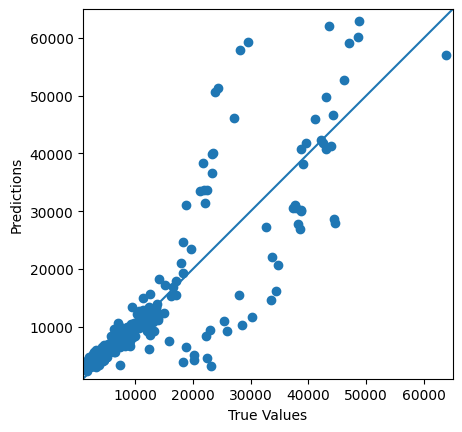

In [156]:
a = plt.axes(aspect='equal')
plt.scatter(ytu_linear, ypu_linear)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [1000, 65000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Regression using a DNN

Repeating the previous process using MULTIPLE LAYERS. The model's performance slightly improves on the validation dataset: mse


In [157]:
# Creating build and compile function with 2 inner layers
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


In [158]:
# Regression using a DNN
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_8 (Dense)             (None, 64)                768       
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________


In [159]:
%%time
start_dnn=time.time()
# Train the model

history = dnn_model.fit(
    train_features,
    train_label,
    validation_split=0.2,
    verbose=0, epochs=100)

end_dnn=time.time()
print("time in seconds: ","{:.2f}".format(end_dnn-start_dnn))

time in seconds:  21.08
CPU times: user 13.4 s, sys: 785 ms, total: 14.2 s
Wall time: 21.1 s


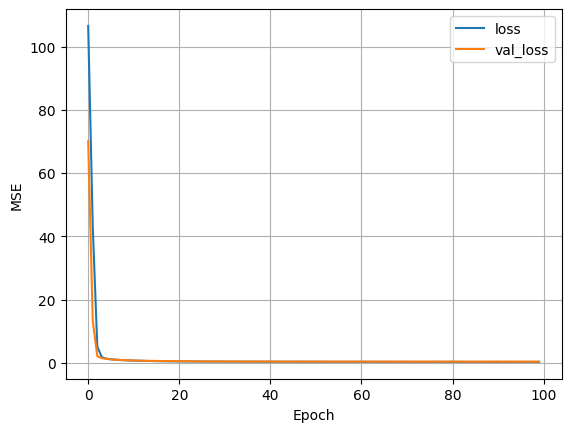

In [160]:
plot_loss(history)


9/9 [==============================] - 0s 2ms/step


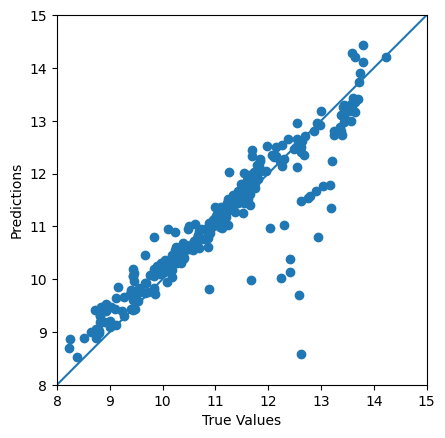

In [161]:
dnn_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, dnn_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [8, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)



## Performance DNN Model

In [162]:
MSE_DNN=mean_squared_error(dnn_predictions, test_label)
MSE_DNN

0.32560282980370947

In [163]:
# MSE Transformed
ypu_dnn=inv_boxcox(dnn_predictions, fit_lambda) #Predicted response untransformed
ytu_dnn=inv_boxcox(test_label, fit_lambda) # Tests data responses
RMSEu_dnn=(mean_squared_error(ypu_dnn, ytu_dnn))**(0.5)
print(RMSEu_dnn)

5573.664919665617


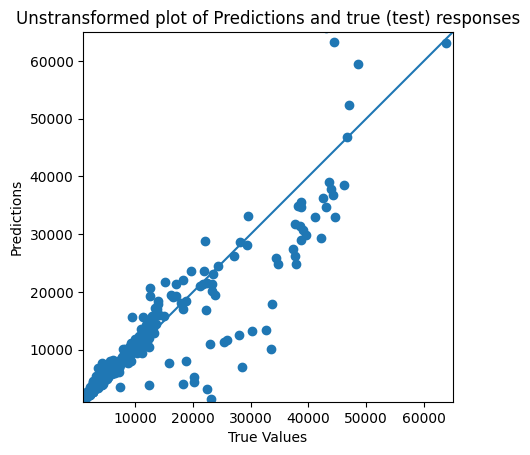

In [164]:
a = plt.axes(aspect='equal')
plt.scatter(ytu_dnn, ypu_dnn)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [1000, 65000]
plt.xlim(lims)
plt.ylim(lims)
plt.title("Unstransformed plot of Predictions and true (test) responses")
_ = plt.plot(lims, lims)

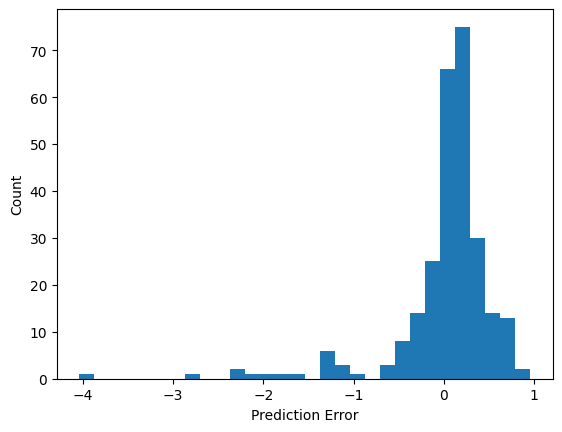

In [165]:
# Error distribution
error = dnn_predictions - test_label
plt.hist(error, bins=30)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')


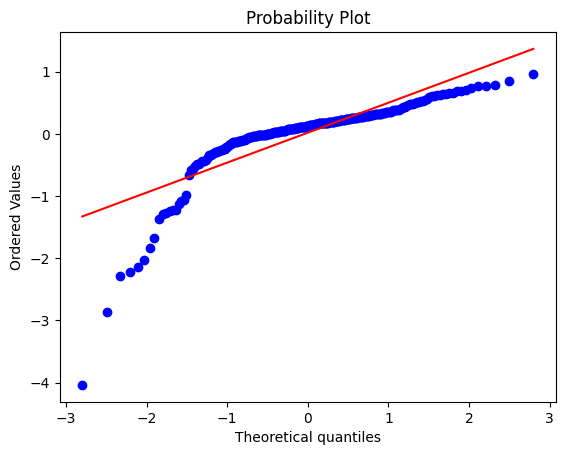

In [166]:
# Q-Q Plot
stats.probplot(error, dist="norm", plot=pylab)
pylab.show()

# Hyperparameter Optimization

Keras Tuner is a library that helps you pick the optimal set of hyperparameters for your model. The process of selecting the right set of hyperparameters for your machine learning (ML) application is called hyperparameter tuning or hypertuning.

Hyperparameters are the variables that govern the training process and the topology of the ML model. These variables remain constant over the training process and directly impact the performance of your ML program. Hyperparameters are of two types:

1. Model hyperparameters which influence model selection such as the number and width of hidden layers
2. Algorithm hyperparameters which influence the speed and quality of the learning algorithm such as the learning rate for Stochastic Gradient Descent (SGD) and the number of nearest neighbors for a k Nearest Neighbors (KNN) classifier


In [167]:
!pip install keras-tuner --upgrade
import keras_tuner as kt
from numpy.random import seed

In [168]:
#Function that return Keras model (changing only the value of the learning rate and nodes per layer)

def build_hp_model(hp):
    model = keras.Sequential([normalizer])
    model.add(keras.layers.Dense(
        hp.Choice('units',[8,16,32,64, 128]), activation='relu'))
    model.add(keras.layers.Dense(
        hp.Choice('units',[8,16,32,64, 128]), activation='relu'))
    model.add(keras.layers.Dense(1))
    hp_learning_rate=hp.Choice('learning_rate', values=[0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1])
    model.compile(loss='mse', metrics=['mse'],
                  optimizer=tf.keras.optimizers.Adam(hp_learning_rate))
    return model

## Random Search Tuner

In [169]:
# Random search set up

tuner_rs=kt.RandomSearch(
    build_hp_model,
    objective='val_loss',
    seed=42,
    max_trials=10,
    overwrite=True)
    #project_name="SWB_one"
    #directory='random_search')



In [170]:
tuner_rs.search_space_summary()

Search space summary
Default search space size: 2
units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1], 'ordered': True}


In [171]:
%%time
start_rs=time.time()
# Run Random search

tuner_rs.search(train_features, train_label, epochs=100, validation_split=0.2, verbose=2, use_multiprocessing=True)

end_rs=time.time()
print("time in seconds: ","{:.2f}".format(end_rs-start_rs))

Trial 10 Complete [00h 00m 19s]
val_loss: 36.41356658935547

Best val_loss So Far: 0.3584800660610199
Total elapsed time: 00h 03m 30s
time in seconds:  210.10
CPU times: user 3min 2s, sys: 11.2 s, total: 3min 13s
Wall time: 3min 30s


In [172]:
#Save best hyperparameters
best_rs=tuner_rs.get_best_hyperparameters()[0]
# Build model with best parameters
hrs_model = tuner_rs.hypermodel.build(best_rs)
hrs_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 128)               1536      
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,200
Trainable params: 18,177
Non-trainable params: 23
_________________________________________________________________


In [173]:
best_rs.values

{'units': 128, 'learning_rate': 0.003}

Epoch 1/100
27/27 - 2s - loss: 34.4698 - mse: 34.4698 - val_loss: 1.8280 - val_mse: 1.8280 - 2s/epoch - 78ms/step
Epoch 2/100
27/27 - 0s - loss: 1.9661 - mse: 1.9661 - val_loss: 1.2442 - val_mse: 1.2442 - 128ms/epoch - 5ms/step
Epoch 3/100
27/27 - 0s - loss: 0.8905 - mse: 0.8905 - val_loss: 0.7398 - val_mse: 0.7398 - 130ms/epoch - 5ms/step
Epoch 4/100
27/27 - 0s - loss: 0.6288 - mse: 0.6288 - val_loss: 0.6180 - val_mse: 0.6180 - 218ms/epoch - 8ms/step
Epoch 5/100
27/27 - 0s - loss: 0.5400 - mse: 0.5400 - val_loss: 0.5719 - val_mse: 0.5719 - 224ms/epoch - 8ms/step
Epoch 6/100
27/27 - 0s - loss: 0.4841 - mse: 0.4841 - val_loss: 0.4977 - val_mse: 0.4977 - 188ms/epoch - 7ms/step
Epoch 7/100
27/27 - 0s - loss: 0.4546 - mse: 0.4546 - val_loss: 0.4972 - val_mse: 0.4972 - 237ms/epoch - 9ms/step
Epoch 8/100
27/27 - 0s - loss: 0.4313 - mse: 0.4313 - val_loss: 0.5060 - val_mse: 0.5060 - 224ms/epoch - 8ms/step
Epoch 9/100
27/27 - 0s - loss: 0.4172 - mse: 0.4172 - val_loss: 0.4662 - val_mse: 0.4662

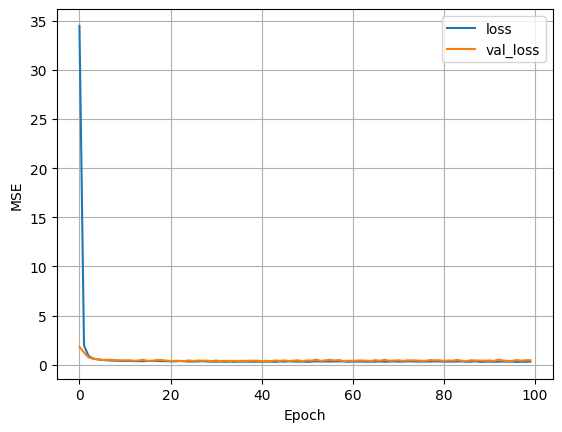

In [174]:
%%time

plot_loss(hrs_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=2, use_multiprocessing=True))

9/9 [==============================] - 0s 2ms/step


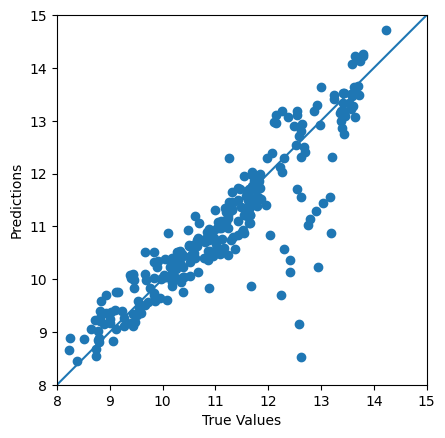

In [175]:
hrs_predictions = hrs_model.predict(test_features).flatten()

hrs = plt.axes(aspect='equal')
plt.scatter(test_label, hrs_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [8, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Performance Random Search

In [176]:
MSE_RS=mean_squared_error(hrs_predictions, test_label)
MSE_RS

0.43109184363931735

In [177]:
# MSE Transformed
ypu_hrs=inv_boxcox(hrs_predictions, fit_lambda) #Predicted response untransformed
ytu_hrs=inv_boxcox(test_label, fit_lambda) # Tests data responses
RMSEu_hrs=(mean_squared_error(ypu_hrs, ytu_hrs))**(0.5)
print(RMSEu_hrs)

6191.248559513226


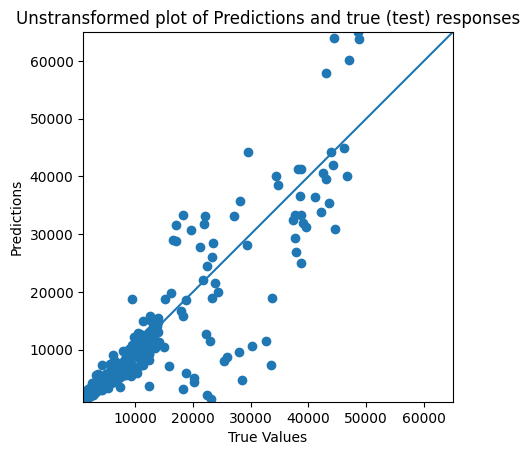

In [178]:
a = plt.axes(aspect='equal')
plt.scatter(ytu_hrs, ypu_hrs)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [1000, 65000]
plt.xlim(lims)
plt.ylim(lims)
plt.title("Unstransformed plot of Predictions and true (test) responses")
_ = plt.plot(lims, lims)

## Hyperband tuning

In [179]:
tuner_hBand = kt.Hyperband(
    build_hp_model,
    objective='val_loss',
    max_epochs=10,
    hyperband_iterations=2,
    overwrite=True)

In [180]:
tuner_hBand.search_space_summary()

Search space summary
Default search space size: 2
units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1], 'ordered': True}


In [181]:
%%time
start_hb=time.time()
#Perform Tuning with Hyperband
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
tuner_hBand.search(train_features, train_label, epochs=100, validation_split=0.2, verbose=2, use_multiprocessing=True)
#callbacks=[stop_early] not included

end_hb=time.time()
print("time in seconds: ","{:.2f}".format(end_hb-start_hb))

Trial 60 Complete [00h 00m 04s]
val_loss: 2.1838576793670654

Best val_loss So Far: 0.3541918992996216
Total elapsed time: 00h 03m 05s
time in seconds:  184.76
CPU times: user 2min 34s, sys: 4.16 s, total: 2min 38s
Wall time: 3min 4s


In [182]:
#Save best hyperparameters
best_hBand=tuner_hBand.get_best_hyperparameters()[0]

In [183]:
best_hBand.values

{'units': 8,
 'learning_rate': 0.05,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0051'}

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 8)                 96        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 200
Trainable params: 177
Non-trainable params: 23
_________________________________________________________________
Epoch 1/100
27/27 - 1s - loss: 53.6791 - mse: 53.6791 - val_loss: 5.3915 - val_mse: 5.3915 - 1s/epoch - 51ms/step
Epoch 2

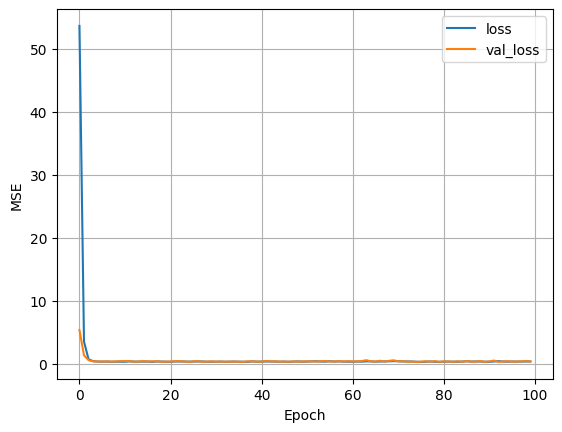

In [184]:
# Build model with best parameters
hBand_model = tuner_hBand.hypermodel.build(best_hBand)
hBand_model.summary()
plot_loss(hBand_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=2,  use_multiprocessing=True))

9/9 [==============================] - 0s 2ms/step


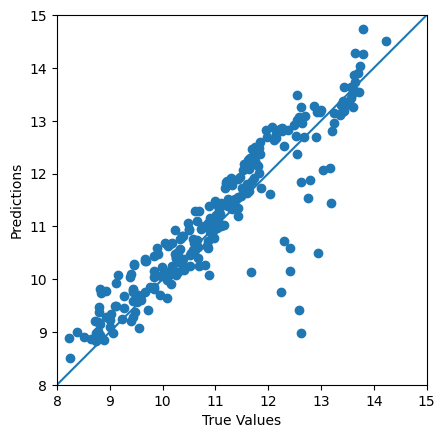

In [185]:
hBand_predictions = hBand_model.predict(test_features).flatten()

hband = plt.axes(aspect='equal')
plt.scatter(test_label, hBand_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [8, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Performance Hyperband

In [186]:
MSE_HB=mean_squared_error(hBand_predictions, test_label)
MSE_HB

0.3729158756297047

In [187]:
# MSE Transformed
ypu_hb=inv_boxcox(hBand_predictions, fit_lambda) #Predicted response untransformed
ytu_hb=inv_boxcox(test_label, fit_lambda) # Tests data responses
RMSEu_hb=(mean_squared_error(ypu_hb, ytu_hb))**(0.5)
print(RMSEu_hb)

5977.276633956598


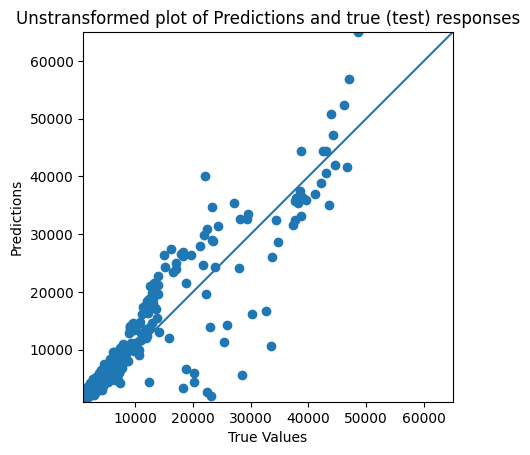

In [188]:
a = plt.axes(aspect='equal')
plt.scatter(ytu_hb, ypu_hb)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [1000, 65000]
plt.xlim(lims)
plt.ylim(lims)
plt.title("Unstransformed plot of Predictions and true (test) responses")
_ = plt.plot(lims, lims)

## Bayes Tuning

In [189]:
tuner_Bayes = kt.BayesianOptimization(
    hypermodel=build_hp_model,
    objective='val_loss',
    max_trials=10,
    num_initial_points=None,
    alpha=0.0001,
    beta=2.6,
    seed=42,
    hyperparameters=None,
    tune_new_entries=True,
    allow_new_entries=True,
    max_retries_per_trial=0,
    max_consecutive_failed_trials=3,
    overwrite=True
)

In [190]:
tuner_Bayes.search_space_summary()

Search space summary
Default search space size: 2
units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1], 'ordered': True}


In [191]:
%%time
start_bayes=time.time()
tuner_Bayes.search(train_features, train_label, epochs=100, validation_split=0.2, verbose=2,
                   use_multiprocessing=True) #callback[stop_early] not incluided

end_bayes=time.time()
print("time in seconds: ","{:.2f}".format(end_bayes-start_bayes))

Trial 10 Complete [00h 00m 21s]
val_loss: 0.3308814465999603

Best val_loss So Far: 0.3308814465999603
Total elapsed time: 00h 03m 18s
time in seconds:  197.66
CPU times: user 2min 58s, sys: 10.8 s, total: 3min 8s
Wall time: 3min 17s


In [192]:
#Save best hyperparameters
best_Bayes=tuner_Bayes.get_best_hyperparameters()[0]
best_Bayes.values

{'units': 8, 'learning_rate': 0.02}

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 8)                 96        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 200
Trainable params: 177
Non-trainable params: 23
_________________________________________________________________
Epoch 1/100
27/27 - 1s - loss: 42.1191 - mse: 42.1191 - val_loss: 4.4241 - val_mse: 4.4241 - 1s/epoch - 50ms/step
Epoch 2

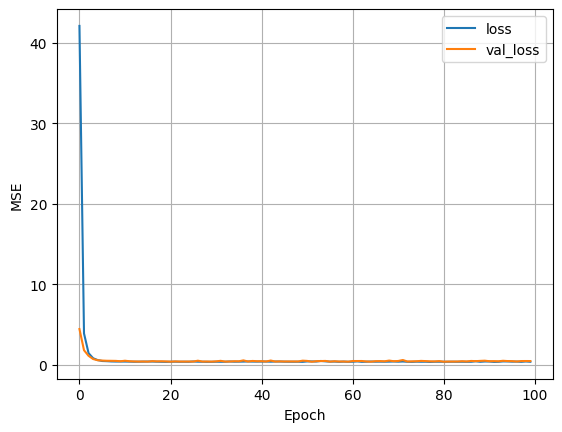

In [193]:
# Build model with best parameters
hBayes_model = tuner_Bayes.hypermodel.build(best_Bayes)
hBayes_model.summary()
plot_loss(hBayes_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=2, use_multiprocessing=True))

9/9 [==============================] - 0s 2ms/step


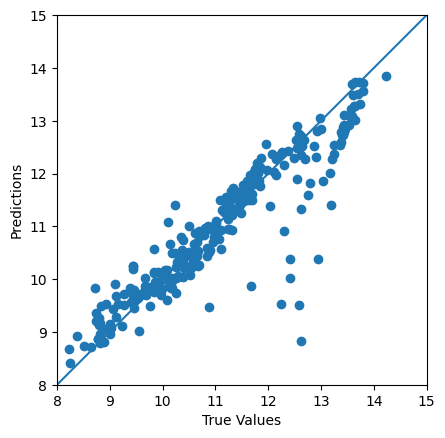

In [194]:
Bayes_predictions = hBayes_model.predict(test_features).flatten()

bayes = plt.axes(aspect='equal')
plt.scatter(test_label, Bayes_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [8, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


### Performance Bayes tuning

In [195]:
MSE_Bayes=mean_squared_error(Bayes_predictions, test_label)
MSE_Bayes

0.3537892765627924

In [196]:
# MSE Transformed
ypu_bayes=inv_boxcox(Bayes_predictions, fit_lambda) #Predicted response untransformed
ytu_bayes=inv_boxcox(test_label, fit_lambda) # Tests data responses
RMSEu_bayes=(mean_squared_error(ypu_bayes, ytu_bayes))**(0.5)
print(RMSEu_bayes)

5563.356575868734


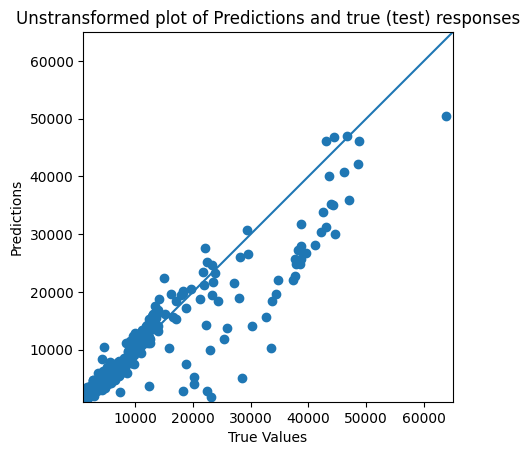

In [197]:
a = plt.axes(aspect='equal')
plt.scatter(ytu_bayes, ypu_bayes)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [1000, 65000]
plt.xlim(lims)
plt.ylim(lims)
plt.title("Unstransformed plot of Predictions and true (test) responses")
_ = plt.plot(lims, lims)

## Grid Search

In [198]:
tunerGrid=kt.GridSearch(
    hypermodel=build_hp_model,
    objective='val_loss',
    max_trials=10,
    seed=None,
    hyperparameters=None,
    tune_new_entries=True,
    allow_new_entries=True,
    max_retries_per_trial=0,
    max_consecutive_failed_trials=3,
    overwrite=True
)


In [199]:
tunerGrid.search_space_summary()

Search space summary
Default search space size: 2
units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1], 'ordered': True}


In [200]:
%%time

start_grid=time.time()
tunerGrid.search(train_features, train_label, epochs=100, validation_split=0.2, verbose=2, use_multiprocessing=True)
#callbacks=[stop_early],

end_grid=time.time()
print("time in seconds: ","{:.2f}".format(end_grid-start_grid))

Trial 10 Complete [00h 00m 22s]
val_loss: 2.493412494659424

Best val_loss So Far: 0.3324670195579529
Total elapsed time: 00h 03m 23s
time in seconds:  202.81
CPU times: user 2min 56s, sys: 11 s, total: 3min 7s
Wall time: 3min 22s


In [201]:
#Save best hyperparameters
bestGrid=tunerGrid.get_best_hyperparameters()[0]
bestGrid.values

{'units': 8, 'learning_rate': 0.003}

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 8)                 96        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 200
Trainable params: 177
Non-trainable params: 23
_________________________________________________________________


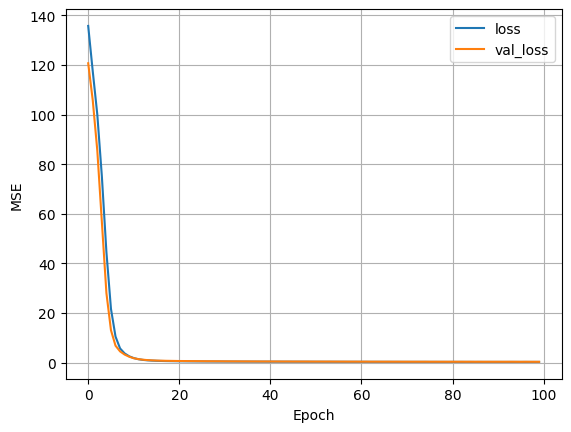

In [202]:
# Build model with best parameters
hGrid_model = tunerGrid.hypermodel.build(bestGrid)
hGrid_model.summary()
plot_loss(hGrid_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=0, use_multiprocessing=True))

9/9 [==============================] - 0s 2ms/step


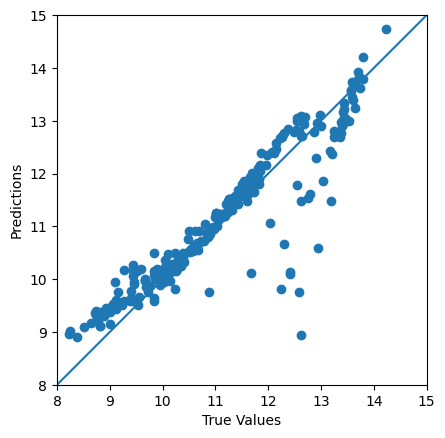

In [203]:
grid_predictions = hGrid_model.predict(test_features).flatten()

grid = plt.axes(aspect='equal')
plt.scatter(test_label, grid_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [8, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


### Performance Grid Tuning

In [204]:
MSE_Grid=mean_squared_error(grid_predictions, test_label)
MSE_Grid

0.3153630043661565

In [205]:
# MSE Transformed
ypu_grid=inv_boxcox(grid_predictions, fit_lambda) #Predicted response untransformed
ytu_grid=inv_boxcox(test_label, fit_lambda) # Tests data responses
RMSEu_grid=(mean_squared_error(ypu_grid, ytu_grid))**(0.5)
print(RMSEu_grid)

5169.24835466725


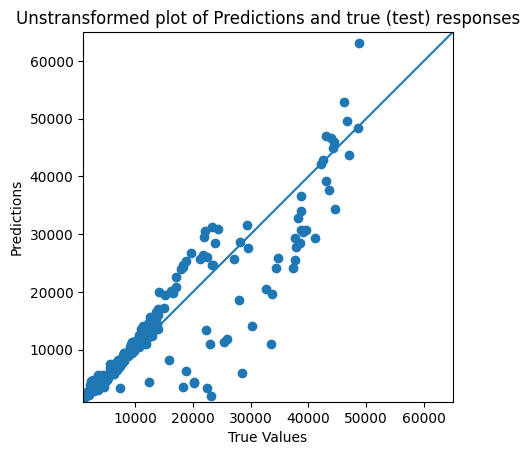

In [206]:
a = plt.axes(aspect='equal')
plt.scatter(ytu_grid, ypu_grid)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [1000, 65000]
plt.xlim(lims)
plt.ylim(lims)
plt.title("Unstransformed plot of Predictions and true (test) responses")
_ = plt.plot(lims, lims)

## Summary of results

In [207]:
Results=[['Simple', MSE_Linear_model, RMSEu_linear, end_simple-start_simple], ['NNet', MSE_DNN, RMSEu_dnn, end_dnn-start_dnn],
         ['Random Search', MSE_RS, RMSEu_hrs, end_rs-start_rs],['Hyperband', MSE_HB, RMSEu_hb, end_hb-start_hb],
         ['Bayes', MSE_Bayes, RMSEu_bayes, end_bayes-start_bayes], ['Grid Search', MSE_Grid, RMSEu_grid, end_grid-start_grid] ]
Results=pd.DataFrame(Results, columns=['Method', 'MSE Transformed y', 'RMSE untransformed y', 'Time in seconds'])
Results


,Method,MSE Transformed y,RMSE untransformed y,Time in seconds
0,Simple,0.432978,7395.559241,10.939701
1,NNet,0.325603,5573.664920,21.078673
2,Random Search,0.431092,6191.248560,210.100207
3,Hyperband,0.372916,5977.276634,184.759044
4,Bayes,0.353789,5563.356576,197.657795
5,Grid Search,0.315363,5169.248355,202.808572


import numpy as np
from google.colab import autoviz
df_282569610571917970 = autoviz.get_df('df_282569610571917970')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_282569610571917970, *['MSE Transformed y'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3531963759652555179 = autoviz.get_df('df_3531963759652555179')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3531963759652555179, *['RMSE untransformed y'], **{})
chart

import numpy as np
from google.colab import autoviz
df_478583278826451641 = autoviz.get_df('df_478583278826451641')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_478583278826451641, *['MSE Transformed y'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4863305154296292246 = autoviz.get_df('df_4863305154296292246')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4863305154296292246, *['RMSE untransformed y'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3618008894929078197 = autoviz.get_df('df_3618008894929078197')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3618008894929078197, *['Method'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1618798781506773093 = autoviz.get_df('df_1618798781506773093')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1618798781506773093, *[[['MSE Transformed y', 'RMSE untransformed y']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7547242324705813728 = autoviz.get_df('df_7547242324705813728')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7547242324705813728, *['MSE Transformed y', 'Method'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6475866230519993077 = autoviz.get_df('df_6475866230519993077')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6475866230519993077, *['RMSE untransformed y', 'Method'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5921163299601445660 = autoviz.get_df('df_5921163299601445660')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5921163299601445660, *['Time in seconds', 'MSE Transformed y', 'Method'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8139018617689310713 = autoviz.get_df('df_8139018617689310713')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8139018617689310713, *['Time in seconds', 'RMSE untransformed y', 'Method'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6775517201415263841 = autoviz.get_df('df_6775517201415263841')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6775517201415263841, *['Time in seconds', 'count()', 'Method'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2460606940885801500 = autoviz.get_df('df_2460606940885801500')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2460606940885801500, *['MSE Transformed y'], **{})
chart

import numpy as np
from google.colab import autoviz
df_448191340944507641 = autoviz.get_df('df_448191340944507641')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_448191340944507641, *['RMSE untransformed y'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3679656354466087245 = autoviz.get_df('df_3679656354466087245')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3679656354466087245, *['MSE Transformed y'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7162593852533700601 = autoviz.get_df('df_7162593852533700601')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7162593852533700601, *['RMSE untransformed y'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2559884599528155233 = autoviz.get_df('df_2559884599528155233')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2559884599528155233, *['Method'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8655723904649955999 = autoviz.get_df('df_8655723904649955999')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_8655723904649955999, *[[['MSE Transformed y', 'RMSE untransformed y']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_1058108429868506023 = autoviz.get_df('df_1058108429868506023')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1058108429868506023, *['MSE Transformed y', 'Method'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_1128149581295208157 = autoviz.get_df('df_1128149581295208157')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1128149581295208157, *['RMSE untransformed y', 'Method'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_1206857826862325566 = autoviz.get_df('df_1206857826862325566')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1206857826862325566, *['Time in seconds', 'MSE Transformed y', 'Method'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9071210401192207994 = autoviz.get_df('df_9071210401192207994')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_9071210401192207994, *['Time in seconds', 'RMSE untransformed y', 'Method'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6085178808982867099 = autoviz.get_df('df_6085178808982867099')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6085178808982867099, *['Time in seconds', 'count()', 'Method'], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
